<a href="https://colab.research.google.com/github/Vishal-Upendran/Astro101/blob/master/FluidMechanics/PolytropicEOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment No. 2

In this assignment, we are to solve the Lane-embden equation, and the isothermal cloud of gas in hydrostatic equilibrium numerically. Instead of using sym-py or Mathematica, let us check if we can use a finite difference method to perform this solution!

In [0]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from google.colab import files

## Lane-Emden equation

We first look at a polytropic self-gravitating fluid in hydrostatic euilibrium. Of course, weak gravity is assumed here. The equation is of the form:
$$\frac{1}{x^2}\frac{d}{dx}\left(x^2\frac{df}{dx}\right) = -\left(f(x)\right)^n,$$
where the equation has been non-dimensionalized such that $$r:=xR,$$ and $$\rho:=\frac{\alpha^n}{\kappa^n(n+1)^2}(f(x))^n.$$
Here, $r$ corresponds to the radial variable, with $R$ the radius to scale the radial variable, and $\rho$ the density, which is scaled by $\alpha$. $\kappa$ is present in the equation of state; same holding for $n$. 
The boundary condition on f goes as: $f(0)=1$, and $f'(0)=0$. The former condition applies as the density becomes a constant infinitesimally close to the center. Similarly, the density gradient, or the pressure gradient must vanish close to the center for consistency.

### Euler approximation and finite difference method:
We use Euler approximation first. Note that the equation has a singularity at x=0, so it must be solved from a point infinitesimally close to x. Let us denote this point by $\epsilon$. Our finite difference equation becomes:
$$f_{i+1} = \frac{1}{1+dx/x}\left(2f_i-(dx)^{-2}f^n_i-f_{i-1}\left(1-\frac{dx}{x}\right)\right)$$

where N is the total number of steps. Our boundary conditions become: $f_{-1} = 1$, and from $f'(0)=0$, we obtain $f_0=f_{-1}=1$. Thus, we can solve for different values of n now.

However, we need to make sure the surface of the star is at x=1. As shall be seen next, we perform our computation from `x=0` to `x=10`, and a normalization can be done as $$x := x_0 y,$$ where $x_0$ is the first point our solution goes to 0. Then, if we define a corresponding scaling in $f$ as $$f := f_0 g,$$ our Lane-Emden equation becomes: $$\frac{f_0^{1-n}}{x_0^2}\frac{1}{y^2}\frac{d}{dy}\left(y^2\frac{dg}{dy}\right) = -\left(g(y)\right)^n,$$ and for the equation to hold, we must have: $$f_0=x_0^{2/(1-n)}.$$ Please note that such a simple scaling will not work for $n=1$, in which case we cannot perform this normalization. Thus, our derivatives will change accordingly as :
$$\frac{dg}{dy} = \frac{df}{dx}\frac{x_0}{f_0}.$$ These are our final values for our derivatives.

In [0]:
def nearest_neighbour(x,val):
    dist=np.abs(x[~np.isnan(x)]-val)
    minv=np.where(dist==np.min(dist))
    return [minv,np.min(dist)]

In [0]:
epsilon = 0.00001
def LaneEmden_Euler(N_steps,Nmax,index=1):
    f_i = 1.0
    f_i_1 = 1.0 #This has ensured f'(0)=0
    ftotal = []
    ftotal.append(f_i)
    dx = Nmax/N_steps
    for i in np.arange(epsilon,Nmax,Nmax/N_steps):
        t1 = 2*f_i
        t2 = np.power(f_i,index)*(dx**2)
        t3 = f_i_1*(1-dx/(i))
        tot = (t1-t2-t3)/(1+dx/i)
        ftotal.append(tot)
        f_i_1 = f_i
        f_i = tot
    return np.asarray(ftotal)
    

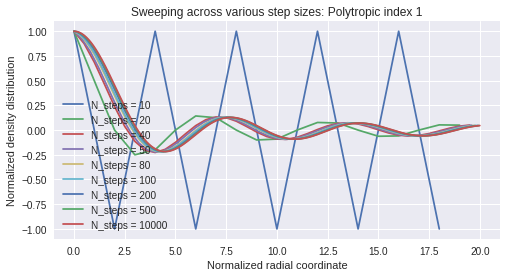

In [0]:
#Sweeping across various values of N_steps here:
plt.figure(figsize=(8,4))
for N_steps in [10,20,40,50,80,100,200,500,10000]:
#N_steps = 100
    index = 1
    Nmax=20.0
    F = LaneEmden_Euler(N_steps,Nmax,index)
    plt.plot(np.arange(epsilon,Nmax,Nmax/N_steps),F[1:],label='N_steps = '+str(N_steps))
plt.xlabel('Normalized radial coordinate')
plt.ylabel('Normalized density distribution')
plt.legend(loc='best')
plt.title('Sweeping across various step sizes: Polytropic index '+str(index))
plt.savefig('Sweep_steps.png',fmt='png',dpi=400)
files.download('Sweep_steps.png')

Old point: 2.45

Polytropic index: 0 ; Derivative value: -0.33265442175734805
Value at center: 0.16659723450227404
----
Old point: 3.14

Polytropic index: 1 ; Derivative value: -1.003683987260671
Value at center: 0.9999999000999001
----
Old point: 4.35

Polytropic index: 2 ; Derivative value: -10.512112289423856
Value at center: 18.922498109640358
----
Old point: 6.9

Polytropic index: 3 ; Derivative value: -2.0211348902821458
Value at center: 6.899999310689311
----
Old point: 10.0

Polytropic index: 4 ; Derivative value: -0.8345115899723593
Value at center: 4.64158836991759
----
Old point: 10.0

Polytropic index: 5 ; Derivative value: -0.5244592275356651
Value at center: 3.162277344256525
----
Old point: 10.0

Polytropic index: 6 ; Derivative value: -0.38663956755636664
Value at center: 2.5118861805718753
----
Old point: 10.0

Polytropic index: 7 ; Derivative value: -0.3082057126055051
Value at center: 2.154434474803643
----
Old point: 10.0

Polytropic index: 8 ; Derivative value: -0.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


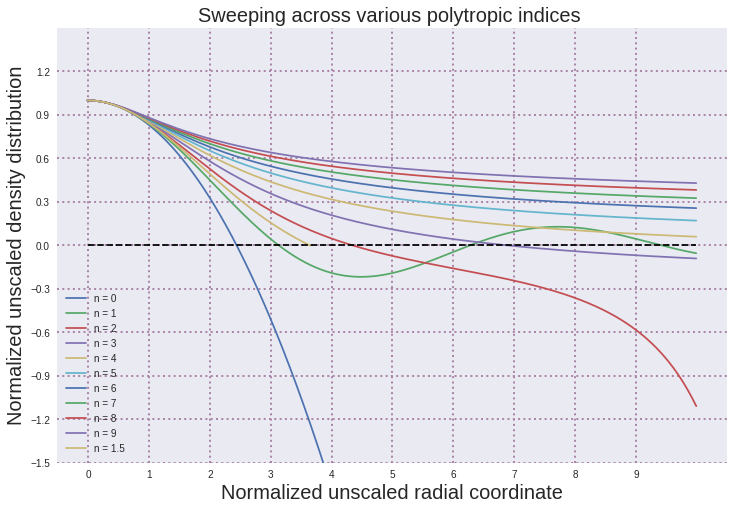

In [0]:
#Sweeping across various polytropic indices here:
plt.figure(figsize=(12,8))
indrng=[i for i in xrange(0,10)]
indrng.append(1.5)
for index in indrng:
    N_steps = 1000
    Nmax=10.0
    F = LaneEmden_Euler(N_steps,Nmax,index)
    plt.plot(np.arange(epsilon-Nmax/N_steps,Nmax,Nmax/N_steps),F,label='n = '+str(index))
    try:
        min_ind,minv=nearest_neighbour(F,0.0)
        min_ind=min_ind[0][0]
        dist_val = min_ind*Nmax/N_steps
        print "Old point: " + str(dist_val)
        raw_deriv = (F[min_ind]-F[min_ind-1])*N_steps/Nmax #Backward difference
        try:
            eta=np.power(dist_val,2.0/(1-index))
        except:
            eta=1.0
        
        mod_deriv= raw_deriv*dist_val/eta
        mod_val=F[1]/eta
        print "\nPolytropic index: "+str(index),
        print "; Derivative value: "+ str(mod_deriv)
        print "Value at center: " + str(mod_val)
        print "----"
    except:
        pass
#Normalize distance to 1, divide x by the value where f goes to 0.
plt.plot(np.arange(epsilon-Nmax/N_steps,Nmax,Nmax/N_steps),np.arange(epsilon-Nmax/N_steps,Nmax,Nmax/N_steps)*0.0,'k--')
plt.xlabel('Normalized unscaled radial coordinate',fontsize=20)
plt.ylabel('Normalized unscaled density distribution',fontsize=20)
plt.legend(loc='best')
plt.title('Sweeping across various polytropic indices ',fontsize=20)
plt.xticks(np.arange(epsilon,Nmax,Nmax/10.0))
plt.yticks(np.arange(-1.5,1.5,0.3))
plt.grid(color='xkcd:dusty lavender',linestyle=':',linewidth=2)
plt.axis([None,None,-1.5,1.5])
plt.savefig('Sweep_index.png',fmt='png',dpi=400)
files.download('Sweep_index.png')

### Mass profile

The mass may be obtained by integrating over the density profile, i.e $$M(r) = \int_{0}^{r}4\pi r'^2\rho(r')dr',$$ where we assume a spherically symmetric density profile. Thus, replacing $\rho$ with $f$, and $r'$ with $x$ according to the scheme done in the class, we obtain the relation: 
$$\frac{dM}{dx}=\left(\frac{\kappa^n (n+1)^n}{4\pi R^2}\right)^{1/(n-1)}\frac{R}{G^{n/(n-1)}}f^nx^2$$

This equation is to be integrated from 0 to $r$. As $r$ tends to zero, it seems pretty obvious the mass tends to 0, since the density tends to a constant. Let us check it out for ourselves. We put all constants as 1 for ease, (except the polytropic index, of course!). The equation then becomes:
$$\frac{dM}{dx}=\left(\frac{(n+1)^n}{4\pi}\right)^{1/(n-1)}f^nx^2$$
$$\Rightarrow M(x)\approx \left(\frac{(n+1)^n}{4\pi}\right)^{1/(n-1)}f^nx^2 (x-\epsilon), $$ for small deviations from $\epsilon$.

In [0]:
'''
  Next, we must look at the behaviour of mass near the center. 
'''
k=1.0
R=1.0
G=1.0
indrng=[i for i in xrange(1,10)]
indrng.append(1.5)
for index in indrng:
    N_steps = 1000
    Nmax=10.0
    F = LaneEmden_Euler(N_steps,Nmax,index)
    print "Polytropic index: " + str(index)
    try:
        prefactor= np.power(np.power(index+1,index)/(4.0*np.pi),1.0/(index-1))
        x=np.arange(epsilon-Nmax/N_steps,Nmax,Nmax/N_steps)
        M_0=prefactor*np.power(F[1],index)*np.power(x[1],2.0)*(x[1]-epsilon)
        M_1=prefactor*np.power(F[2],index)*np.power(x[2],2.0)*(x[2]-epsilon)
        M_2=prefactor*np.power(F[3],index)*np.power(x[3],2.0)*(x[3]-epsilon)
        print "Mass change on approaching the x=0 is: "+ str(M_0)+"<--",
        print str(M_1)+"<--"+str(M_2)
    except:
        print "Manual simplification required"
    print "----"
    
    

Polytropic index: 1
Manual simplification required
----
Polytropic index: 2
Mass change on approaching the x=0 is: -2.924017048198954e-29<-- 7.175584140626081e-07<--5.733777941221508e-06
----
Polytropic index: 3
Mass change on approaching the x=0 is: -9.213661794565048e-29<-- 2.2609340860934146e-06<--1.8064889483342187e-05
----
Polytropic index: 4
Mass change on approaching the x=0 is: -1.501425840185705e-28<-- 3.6841541608198965e-06<--2.9433980962259083e-05
----
Polytropic index: 5
Mass change on approaching the x=0 is: -2.036262305310294e-28<-- 4.99627005284596e-06<--3.991360173999642e-05
----
Polytropic index: 6
Mass change on approaching the x=0 is: -2.5422763458036237e-28<-- 6.237538124203033e-06<--4.982554255797494e-05
----
Polytropic index: 7
Mass change on approaching the x=0 is: -3.029356458142578e-28<-- 7.432229455450901e-06<--5.93638068924625e-05
----
Polytropic index: 8
Mass change on approaching the x=0 is: -3.5033205937348317e-28<-- 8.594624087385268e-06<--6.8642538297080

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


### Isothermal sphere numerical solution
The nondimensionalized equation for an isothermal sphere, with the appropriate factors is available in the assignment file accompanaying this booklet. The equation resulting from combining the Hydrostatic equilibrium equation and Poisson's equation is:
$$\frac{d^2f}{dx^2}+\frac{2}{x}\frac{df}{dx}=e^{-f},$$ where: $\phi:=\phi_0f$ the gravitational potential, $\rho:=\rho_0\tilde{\rho}$ is the density, $r:=xR$ is the radius, with the non-dimensionalizing constants being $$\tilde{\rho}=Ae^{-f},$$ $$\rho_0=\frac{\phi_0}{4\pi G R^2 A},$$ and $\phi_0= \kappa$, the proportionality constant in equation of state. The corresponding finite difference equation is:
$$f_{n+1}=\left(2f_n+e^{-f_n}-f_{n-1}\left(1-\frac{dx}{x}\right)\right)\frac{1}{1+dx/x},$$ with our usual broundary condition of $f(0)=1,f'(0)=0$. 

In [0]:
epsilon=0.0001
def Isothermal(Nsteps,Nmax):
    f_n=0.0 #f(0)
    f_n_1=0.0 #f(-1)
    f=[]
    dx=Nmax/Nsteps
    f.append(f_n)
    for x in np.arange(epsilon,Nmax,dx):
        t1=2*f_n
        t2=np.exp(-f_n)*dx**2
        t3=f_n_1*(1-dx/x)
        f_n1=(t1+t2-t3)/(1+dx/x)
        f.append(f_n1)
        f_n_1=f_n
        f_n=f_n1
    return np.asarray(f)
    

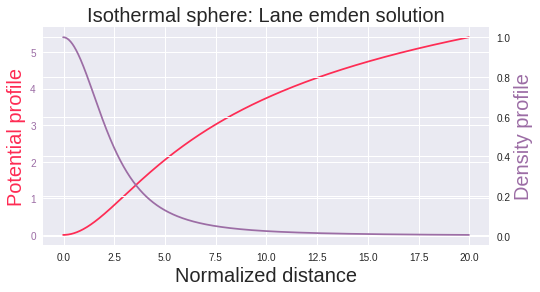

In [0]:
#Plotting the isothermal cloud.
Nsteps=1000
Nmax=20.0
f=Isothermal(Nsteps,Nmax)
rho_tilde=np.exp(-f) #Assume A=1
x=np.arange(epsilon-Nmax/Nsteps,Nmax,Nmax/Nsteps)
fig,ax=plt.subplots(figsize=(8,4))
ax.plot(x,f,'xkcd:reddish pink')
ax.set_xlabel('Normalized distance',fontsize=20)
ax.set_ylabel('Potential profile',fontsize=20,color='xkcd:reddish pink')
ax.tick_params(axis='y',labelcolor='xkcd:reddish pink')
ax.set_title('Isothermal sphere: Lane emden solution',fontsize=20)
ax2=ax.twinx()
ax2.set_ylabel('Density profile',fontsize=20,color='xkcd:dark lilac')
ax2.plot(x,rho_tilde,'xkcd:dark lilac')
ax.tick_params(axis='y',labelcolor='xkcd:dark lilac')
plt.savefig('Isothermal.png',fmt='png',dpi=400)
files.download('Isothermal.png')